<a href="https://colab.research.google.com/github/mopahlevani/Internship-Scripts/blob/main/Plotting_V2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload these files in the same directory, then run the code:
- temperature_du_milieu.txt
- densite_massique.txt
- position_moyenne.txt

# Libraries

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import os
import seaborn as sns

# Reading files and writing CSVs

In [ ]:
def process_txt_to_csv(input_txt, directory):
    """
    Process a .txt file and write the data to a .csv file in the same directory,
    skipping the first 3 lines (header).

    Args:
        input_txt (str): Path to the input .txt file.
    """
    # Define output file path (same directory as input, but with .csv extension)
    output_csv = os.path.splitext(input_txt)[0] + '.csv'

    # Ensure the output directory exists
    os.makedirs(os.path.dirname(output_csv), exist_ok=True)

    with open(input_txt, 'r', encoding='utf-8') as txt_file:
        lines = txt_file.readlines()

    # Skip the first 3 lines (header)
    data_lines = lines[3:]

    # Write to CSV
    with open(output_csv, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        for line in data_lines:
            # Split line by whitespace (change delimiter if needed)
            row = line.strip().split()
            writer.writerow(row)

    print(f"Done. Data after skipping 3 lines written to {output_csv} in {directory}")

In [ ]:
def process_files_in_directories(directories):
    """
    Process the same set of files in multiple directories.

    Args:
        directories (list of str): List of input directories (e.g., ['Case1', 'Case2']).
    """
    # Files to process (the same files across all directories)
    files_to_process = [
        'temperature_du_milieu.txt',
        'densite_massique.txt',
        'position_moyenne.txt',
        'numero_milieu.txt'
    ]

    # Loop through each directory and process each file
    for directory in directories:
        for file in files_to_process:
            input_txt = os.path.join(directory, file)
            process_txt_to_csv(input_txt, directory)  # Pass directory to function

In [ ]:
directories = ['Case1', 'Case2']  # Add more directories here as needed

process_files_in_directories(directories)

Done. Data after skipping 3 lines written to Case1/temperature_du_milieu.csv in Case1
Done. Data after skipping 3 lines written to Case1/densite_massique.csv in Case1
Done. Data after skipping 3 lines written to Case1/position_moyenne.csv in Case1
Done. Data after skipping 3 lines written to Case1/numero_milieu.csv in Case1
Done. Data after skipping 3 lines written to Case2/temperature_du_milieu.csv in Case2
Done. Data after skipping 3 lines written to Case2/densite_massique.csv in Case2
Done. Data after skipping 3 lines written to Case2/position_moyenne.csv in Case2
Done. Data after skipping 3 lines written to Case2/numero_milieu.csv in Case2


# Merging Files

In [ ]:
# 1. Define a global function for case-specific operations
def case_specific_operations(input_dir):
    """
    Perform any case-specific operations, like renaming columns.

    Args:
        input_dir (str): Directory containing the dataset files.
    """
    # Read in the CSV files for this specific case
    df_pos = pd.read_csv(os.path.join(input_dir, 'position_moyenne.csv'), header=None)
    df_temp = pd.read_csv(os.path.join(input_dir, 'temperature_du_milieu.csv'), header=None)
    df_dens = pd.read_csv(os.path.join(input_dir, 'densite_massique.csv'), header=None)

    # Rename columns
    def rename_columns(df):
        num_cells = df.shape[1] - 1
        new_cols = ['time'] + [f'cell{i+1}' for i in range(num_cells)]
        df.columns = new_cols
        return df

    df_pos = rename_columns(df_pos)
    df_temp = rename_columns(df_temp)
    df_dens = rename_columns(df_dens)

    return df_pos, df_temp, df_dens

# 2. Define the merge datasets function
def merge_datasets(input_dir, case_dict):
    """
    Merge datasets for a specific directory and return the merged DataFrame.

    Args:
        input_dir (str): Directory containing the dataset files.
        case_dict (dict): Dictionary to store the case DataFrames (df_pos, df_temp, df_dens).
    """
    # Perform case-specific operations (reading and renaming columns)
    df_pos, df_temp, df_dens = case_specific_operations(input_dir)

    # Store DataFrames in the dictionary using the case name (directory) as key
    case_dict[input_dir] = {
        'df_pos': df_pos,
        'df_temp': df_temp,
        'df_dens': df_dens
    }

    # Melt each DataFrame to long format
    long_pos = df_pos.melt(id_vars='time', var_name='cell', value_name='position')
    long_temp = df_temp.melt(id_vars='time', var_name='cell', value_name='temperature')
    long_dens = df_dens.melt(id_vars='time', var_name='cell', value_name='density')

    # Merge on 'time' and 'cell'
    merged_temp = pd.merge(long_pos, long_temp, on=['time', 'cell'])
    merged_dens = pd.merge(long_pos, long_dens, on=['time', 'cell'])

    # Merge the temperature and density data
    merged_data = pd.merge(merged_temp, merged_dens, on=['time', 'cell'])

    # Save merged data for the case
    merged_data.to_csv(os.path.join(input_dir, 'merged_data.csv'), index=False)
    print(f"Merged data saved to {input_dir}/merged_data.csv")

    return merged_data

# 3. Example usage: Iterate over directories and store DataFrames in the dictionary
def process_multiple_directories(directories):
    case_dict = {}  # Dictionary to store case dataframes by directory name

    for directory in directories:
        merged_data = merge_datasets(directory, case_dict)
        print(f"Processed directory: {directory}")

    # Return the dictionary for later use
    return case_dict

# Example usage
case_data = process_multiple_directories(directories)

# Access DataFrames later using the case name (e.g., 'Case1')
df_pos_case1 = case_data['Case1']['df_pos']
#df_temp_case1 = case_data['Case1']['df_temp']
#df_dens_case1 = case_data['Case1']['df_dens']


df_pos_case2 = case_data['Case2']['df_pos']
#df_temp_case2 = case_data['Case2']['df_temp']
#df_dens_case2 = case_data['Case2']['df_dens']
"""
df_pos_case3 = case_data['Case3']['df_pos']
df_temp_case3 = case_data['Case3']['df_temp']
df_dens_case3 = case_data['Case3']['df_dens']
"""

Merged data saved to Case1/merged_data.csv
Processed directory: Case1
Merged data saved to Case2/merged_data.csv
Processed directory: Case2


"\ndf_pos_case3 = case_data['Case3']['df_pos']\ndf_temp_case3 = case_data['Case3']['df_temp']\ndf_dens_case3 = case_data['Case3']['df_dens']\n"

In [ ]:
# Ensure matplotlib and seaborn styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 10)  # Adjust figure size for grid layout

def plot_all_four(df_pos, df_temp, df_dens, output_dir, case_name):
    """
    Generate and save four plots for each case, arranged in a 2x2 grid:
    1. Temperature Heatmap (Time vs Cell)
    2. Position vs. Time colored by Temperature
    3. Density Heatmap (Time vs Cell)
    4. Position vs. Time colored by Density

    Args:
        df_pos (DataFrame): DataFrame containing position data.
        df_temp (DataFrame): DataFrame containing temperature data.
        df_dens (DataFrame): DataFrame containing density data.
        output_dir (str): Directory where to save the plots.
        case_name (str): Name of the case (e.g., 'Case1') for labeling.
    """
    plt.close('all')  # Clear all previous plots (avoid overlap in Jupyter/notebook)

    sns.set(style="whitegrid")
    plt.rcParams["figure.figsize"] = (12, 10)

    long_pos = df_pos.melt(id_vars='time', var_name='cell', value_name='position')
    long_temp = df_temp.melt(id_vars='time', var_name='cell', value_name='temperature')
    merged_temp = pd.merge(long_pos, long_temp, on=['time', 'cell'])

    long_dens = df_dens.melt(id_vars='time', var_name='cell', value_name='Density')
    merged_dens = pd.merge(long_pos, long_dens, on=['time', 'cell'])

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Plots for {case_name}", fontsize=16)

    # 1. Temperature Heatmap (Time vs Cell) - Plot in the top-left
    merged_temp['cell_num'] = merged_temp['cell'].str.extract(r'(\d+)').astype(int)
    temp_matrix = merged_temp.pivot(index='time', columns='cell_num', values='temperature')

    time = temp_matrix.index.values
    cell_nums = temp_matrix.columns.values

    time_edges = np.append(time, time[-1] + (time[-1] - time[-2]) if len(time) > 1 else 1)
    cell_edges = np.append(cell_nums, cell_nums[-1] + (cell_nums[-1] - cell_nums[-2]) if len(cell_nums) > 1 else 1)

    mesh = axs[0, 0].pcolormesh(time_edges, cell_edges, temp_matrix.values.T, shading='auto', cmap='viridis', norm=LogNorm())
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Cell Number')
    axs[0, 0].set_title(f'Temperature Heatmap (Time vs Cell)')
    fig.colorbar(mesh, ax=axs[0, 0], label='Temperature (k)')

    # 2. Position vs. Time colored by Temperature - Plot in the top-right
    scatter_temp = axs[0, 1].scatter(merged_temp['time'], merged_temp['position'], c=merged_temp['temperature'], cmap='viridis')
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('Position (m)')
    axs[0, 1].set_title(f'Position vs. Time colored by Temperature')
    fig.colorbar(scatter_temp, ax=axs[0, 1], label='Temperature (k)')

    # 3. Density Heatmap (Time vs Cell) - Plot in the bottom-left
    merged_dens['cell_num'] = merged_dens['cell'].str.extract(r'(\d+)').astype(int)
    dens_matrix = merged_dens.pivot(index='time', columns='cell_num', values='Density')

    time = dens_matrix.index.values
    cell_nums = dens_matrix.columns.values

    time_edges = np.append(time, time[-1] + (time[-1] - time[-2]) if len(time) > 1 else 1)
    cell_edges = np.append(cell_nums, cell_nums[-1] + (cell_nums[-1] - cell_nums[-2]) if len(cell_nums) > 1 else 1)

    mesh_dens = axs[1, 0].pcolormesh(time_edges, cell_edges, dens_matrix.values.T, shading='auto', cmap='viridis', norm=LogNorm())
    axs[1, 0].set_xlabel('Time (s)')
    axs[1, 0].set_ylabel('Cell Number')
    axs[1, 0].set_title(f'Density Heatmap (Time vs Cell)')
    fig.colorbar(mesh_dens, ax=axs[1, 0], label='Density (kg/m^3)')

    # 4. Position vs. Time colored by Density - Plot in the bottom-right
    scatter_dens = axs[1, 1].scatter(
    merged_dens['time'],
    merged_dens['position'],
    c=merged_dens['Density'],
    cmap='viridis',
    norm=LogNorm(vmin=merged_dens['Density'].min(), vmax=1000)
)
    axs[1, 1].set_xlabel('Time (s)')
    axs[1, 1].set_ylabel('Position (m)')
    axs[1, 1].set_title(f'Position vs. Time colored by Density')
    fig.colorbar(scatter_dens, ax=axs[1, 1], label='Density (kg/m^3)')

    # Save the figure
    plot_filename = os.path.join(output_dir, f'{case_name}_All_Plots.png')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust title position to avoid overlap
    plt.savefig(plot_filename)
    plt.show()


In [ ]:
# Now, let's define a function to process the data and plot all four for each case/directory

def process_and_plot_all(directories, case_data):
    """
    Process the data and plot all four plots for each directory.

    Args:
        directories (list of str): List of directories (e.g., ['Case1', 'Case2']).
        case_data (dict): Dictionary containing case-specific DataFrames (df_pos, df_temp, df_dens).
    """
    for directory in directories:
        # Get the case data for this directory
        df_pos = case_data[directory]['df_pos']
        df_temp = case_data[directory]['df_temp']
        df_dens = case_data[directory]['df_dens']

        # Plot all four plots for this case
        plot_all_four(df_pos, df_temp, df_dens, directory, directory)

Merged data saved to Case1/merged_data.csv
Processed directory: Case1


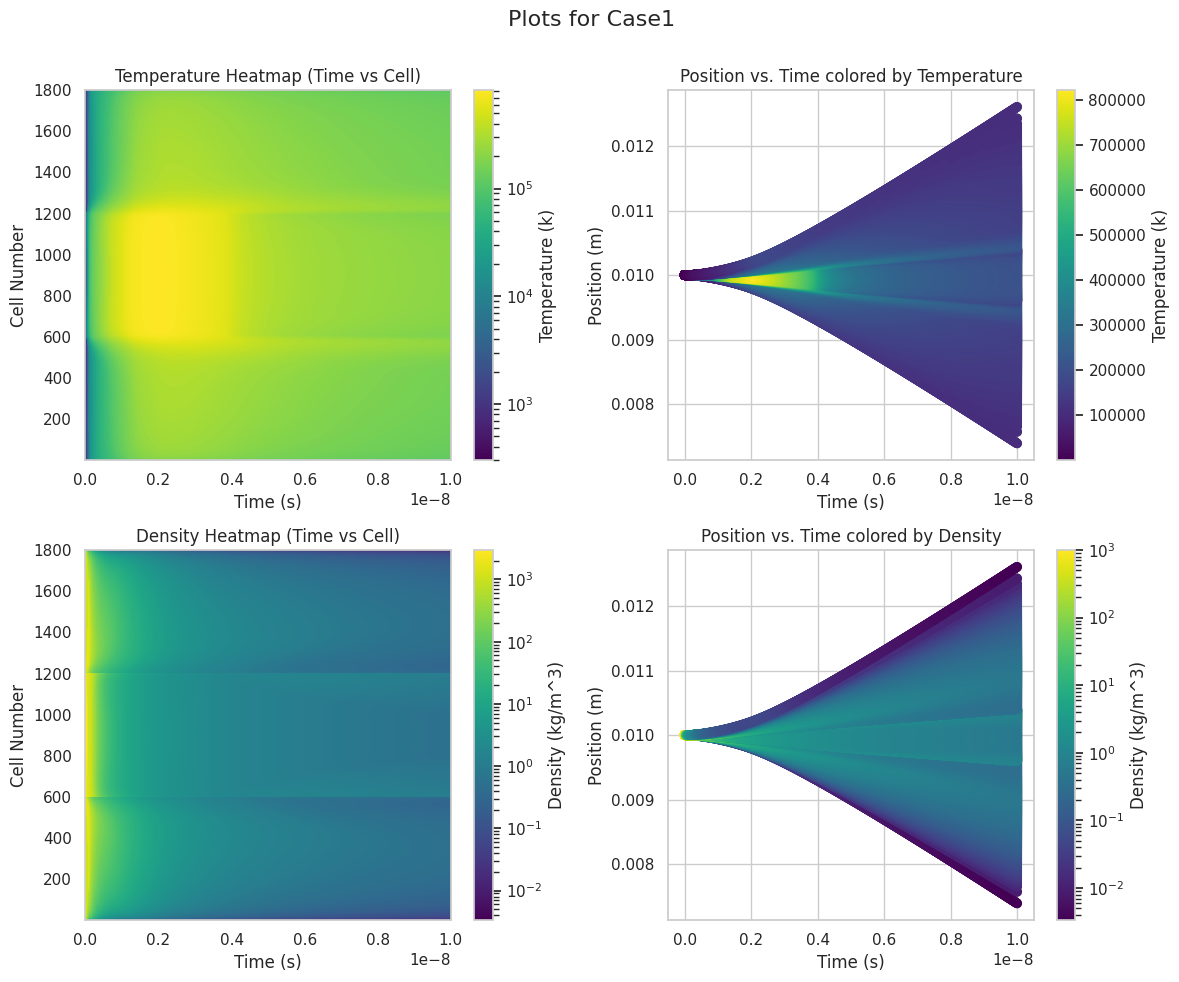

In [ ]:
# Example usage
case_data = process_multiple_directories(directories)  # Process and store data
process_and_plot_all(directories, case_data)  # Plot for each case

In [ ]:
def plot_all_four_hexbin(df_pos, df_temp, df_dens, output_dir, case_name):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import os
    from matplotlib.colors import LogNorm

    plt.close('all')

    sns.set(style="whitegrid")
    plt.rcParams["figure.figsize"] = (12, 10)

    long_pos = df_pos.melt(id_vars='time', var_name='cell', value_name='position')
    long_temp = df_temp.melt(id_vars='time', var_name='cell', value_name='temperature')
    merged_temp = pd.merge(long_pos, long_temp, on=['time', 'cell'])

    long_dens = df_dens.melt(id_vars='time', var_name='cell', value_name='Density')
    merged_dens = pd.merge(long_pos, long_dens, on=['time', 'cell'])

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Plots for {case_name}", fontsize=16)

    # 1. Temperature Heatmap
    merged_temp['cell_num'] = merged_temp['cell'].str.extract(r'(\d+)').astype(int)
    temp_matrix = merged_temp.pivot(index='time', columns='cell_num', values='temperature')
    time = temp_matrix.index.values
    cell_nums = temp_matrix.columns.values
    time_edges = np.append(time, time[-1] + (time[-1] - time[-2]) if len(time) > 1 else 1)
    cell_edges = np.append(cell_nums, cell_nums[-1] + (cell_nums[-1] - cell_nums[-2]) if len(cell_nums) > 1 else 1)
    mesh = axs[0, 0].pcolormesh(time_edges, cell_edges, temp_matrix.values.T, shading='auto', cmap='viridis', norm=LogNorm())
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Cell Number')
    axs[0, 0].set_title(f'Temperature Heatmap (Time vs Cell)')
    fig.colorbar(mesh, ax=axs[0, 0], label='Temperature (k)')

    # 2. Position vs. Time colored by Temperature (HEXBIN)
    hb_temp = axs[0, 1].hexbin(
        merged_temp['time'],
        merged_temp['position'],
        C=merged_temp['temperature'],
        gridsize=100,
        cmap='viridis',
        norm=LogNorm(vmin=merged_temp['temperature'].min(), vmax=merged_temp['temperature'].max()),
        reduce_C_function=np.mean
    )
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('Position (m)')
    axs[0, 1].set_title(f'Position vs. Time colored by Temperature (Hexbin)')
    fig.colorbar(hb_temp, ax=axs[0, 1], label='Mean Temperature (k)')

    # 3. Density Heatmap
    merged_dens['cell_num'] = merged_dens['cell'].str.extract(r'(\d+)').astype(int)
    dens_matrix = merged_dens.pivot(index='time', columns='cell_num', values='Density')
    time = dens_matrix.index.values
    cell_nums = dens_matrix.columns.values
    time_edges = np.append(time, time[-1] + (time[-1] - time[-2]) if len(time) > 1 else 1)
    cell_edges = np.append(cell_nums, cell_nums[-1] + (cell_nums[-1] - cell_nums[-2]) if len(cell_nums) > 1 else 1)
    mesh_dens = axs[1, 0].pcolormesh(time_edges, cell_edges, dens_matrix.values.T, shading='auto', cmap='viridis', norm=LogNorm())
    axs[1, 0].set_xlabel('Time (s)')
    axs[1, 0].set_ylabel('Cell Number')
    axs[1, 0].set_title(f'Density Heatmap (Time vs Cell)')
    fig.colorbar(mesh_dens, ax=axs[1, 0], label='Density (kg/m^3)')

    # 4. Position vs. Time colored by Density (HEXBIN)
    dens_positive = merged_dens[merged_dens['Density'] > 0]
    hb_dens = axs[1, 1].hexbin(
        dens_positive['time'],
        dens_positive['position'],
        C=dens_positive['Density'],
        gridsize=100,
        cmap='viridis',
        norm=LogNorm(vmin=dens_positive['Density'].min(), vmax=1000),
        reduce_C_function=np.mean
    )
    axs[1, 1].set_xlabel('Time (s)')
    axs[1, 1].set_ylabel('Position (m)')
    axs[1, 1].set_title(f'Position vs. Time colored by Density (Hexbin)')
    fig.colorbar(hb_dens, ax=axs[1, 1], label='Mean Density (kg/m^3)')

    plot_filename = os.path.join(output_dir, f'{case_name}_All_Plots_Hexbin.png')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.savefig(plot_filename)
    plt.show()


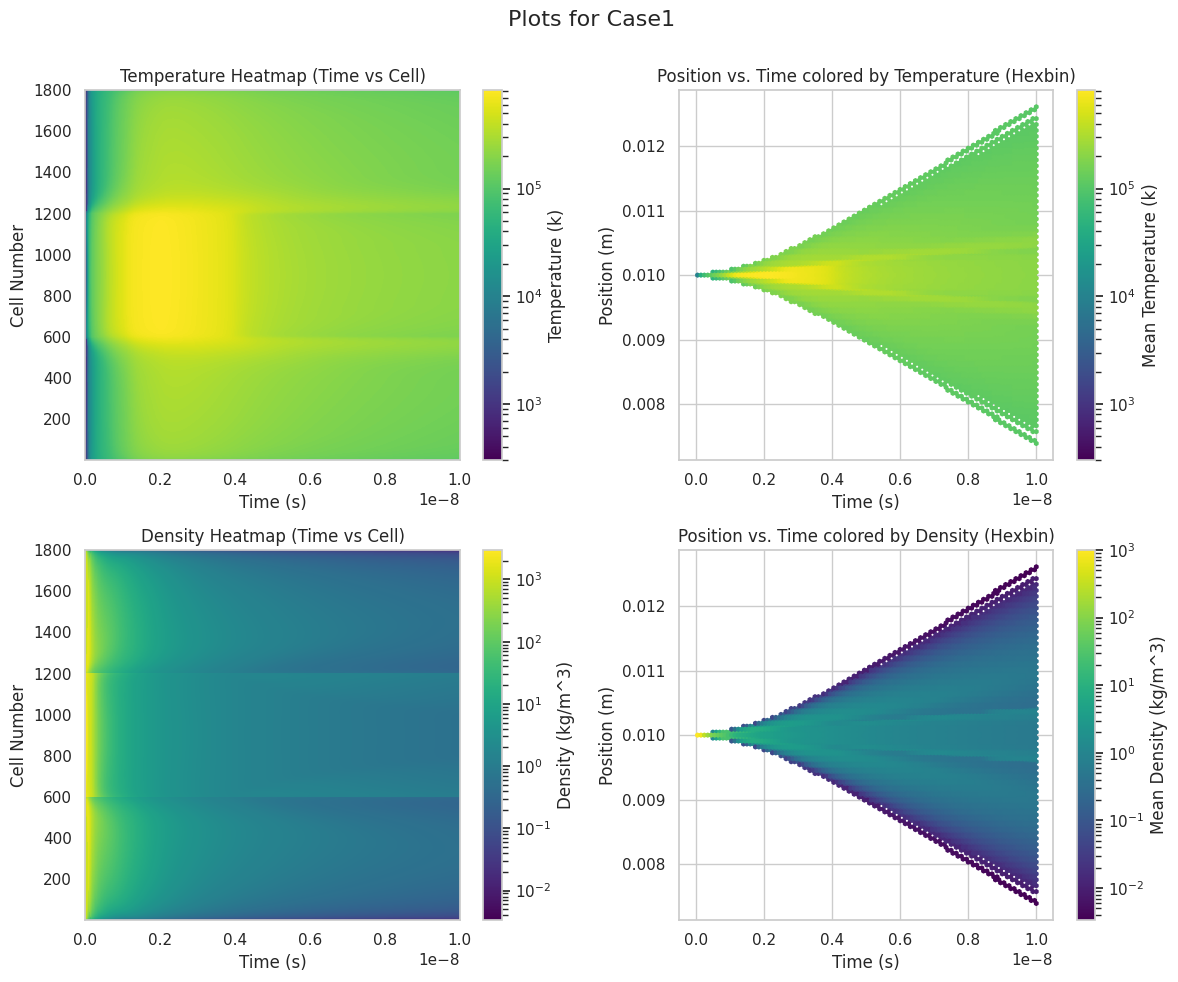

In [ ]:
# For all cases, plot hexbin version
for directory in directories:
    df_pos = case_data[directory]['df_pos']
    df_temp = case_data[directory]['df_temp']
    df_dens = case_data[directory]['df_dens']
    plot_all_four_hexbin(df_pos, df_temp, df_dens, directory, directory)


In [ ]:
def plot_all_four_scatter_shuffle(df_pos, df_temp, df_dens, output_dir, case_name):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import os
    from matplotlib.colors import LogNorm

    plt.close('all')

    sns.set(style="whitegrid")
    plt.rcParams["figure.figsize"] = (12, 10)

    long_pos = df_pos.melt(id_vars='time', var_name='cell', value_name='position')
    long_temp = df_temp.melt(id_vars='time', var_name='cell', value_name='temperature')
    merged_temp = pd.merge(long_pos, long_temp, on=['time', 'cell'])

    long_dens = df_dens.melt(id_vars='time', var_name='cell', value_name='Density')
    merged_dens = pd.merge(long_pos, long_dens, on=['time', 'cell'])

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Plots for {case_name}", fontsize=16)

    # 1. Temperature Heatmap
    merged_temp['cell_num'] = merged_temp['cell'].str.extract(r'(\d+)').astype(int)
    temp_matrix = merged_temp.pivot(index='time', columns='cell_num', values='temperature')
    time = temp_matrix.index.values
    cell_nums = temp_matrix.columns.values
    time_edges = np.append(time, time[-1] + (time[-1] - time[-2]) if len(time) > 1 else 1)
    cell_edges = np.append(cell_nums, cell_nums[-1] + (cell_nums[-1] - cell_nums[-2]) if len(cell_nums) > 1 else 1)
    mesh = axs[0, 0].pcolormesh(time_edges, cell_edges, temp_matrix.values.T, shading='auto', cmap='viridis', norm=LogNorm())
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('Cell Number')
    axs[0, 0].set_title(f'Temperature Heatmap (Time vs Cell)')
    fig.colorbar(mesh, ax=axs[0, 0], label='Temperature (k)')

    # 2. Position vs. Time colored by Temperature (SCATTER, shuffled, low alpha)
    shuffled_temp = merged_temp.sample(frac=1, random_state=0)
    scatter_temp = axs[0, 1].scatter(
        shuffled_temp['time'],
        shuffled_temp['position'],
        c=shuffled_temp['temperature'],
        cmap='viridis',
        norm=LogNorm(vmin=shuffled_temp['temperature'].min(), vmax=shuffled_temp['temperature'].max()),
        alpha=0.15,
        s=5
    )
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('Position (m)')
    axs[0, 1].set_title(f'Position vs. Time colored by Temperature (Shuffled)')
    fig.colorbar(scatter_temp, ax=axs[0, 1], label='Temperature (k)')

    # 3. Density Heatmap
    merged_dens['cell_num'] = merged_dens['cell'].str.extract(r'(\d+)').astype(int)
    dens_matrix = merged_dens.pivot(index='time', columns='cell_num', values='Density')
    time = dens_matrix.index.values
    cell_nums = dens_matrix.columns.values
    time_edges = np.append(time, time[-1] + (time[-1] - time[-2]) if len(time) > 1 else 1)
    cell_edges = np.append(cell_nums, cell_nums[-1] + (cell_nums[-1] - cell_nums[-2]) if len(cell_nums) > 1 else 1)
    mesh_dens = axs[1, 0].pcolormesh(time_edges, cell_edges, dens_matrix.values.T, shading='auto', cmap='viridis', norm=LogNorm())
    axs[1, 0].set_xlabel('Time (s)')
    axs[1, 0].set_ylabel('Cell Number')
    axs[1, 0].set_title(f'Density Heatmap (Time vs Cell)')
    fig.colorbar(mesh_dens, ax=axs[1, 0], label='Density (kg/m^3)')

    # 4. Position vs. Time colored by Density (SCATTER, shuffled, low alpha)
    dens_positive = merged_dens[merged_dens['Density'] > 0]
    shuffled_dens = dens_positive.sample(frac=1, random_state=0)
    scatter_dens = axs[1, 1].scatter(
        shuffled_dens['time'],
        shuffled_dens['position'],
        c=shuffled_dens['Density'],
        cmap='viridis',
        norm=LogNorm(vmin=shuffled_dens['Density'].min(), vmax=1000),
        alpha=0.15,
        s=5
    )
    axs[1, 1].set_xlabel('Time (s)')
    axs[1, 1].set_ylabel('Position (m)')
    axs[1, 1].set_title(f'Position vs. Time colored by Density (Shuffled)')
    fig.colorbar(scatter_dens, ax=axs[1, 1], label='Density (kg/m^3)')

    plot_filename = os.path.join(output_dir, f'{case_name}_All_Plots_ScatterShuffled.png')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.savefig(plot_filename)
    plt.show()


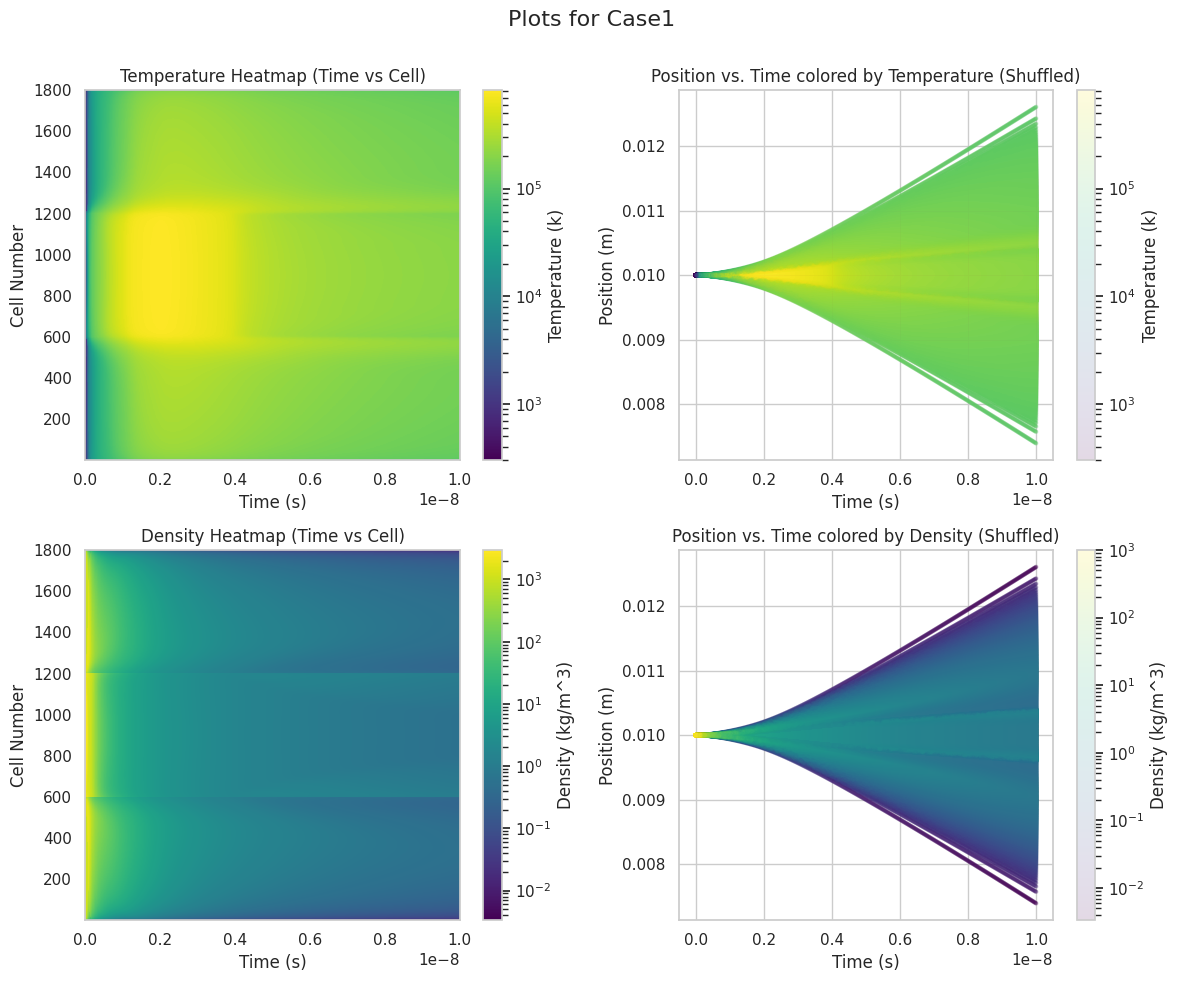

In [ ]:
# For all cases, plot scatter-shuffled version
for directory in directories:
    df_pos = case_data[directory]['df_pos']
    df_temp = case_data[directory]['df_temp']
    df_dens = case_data[directory]['df_dens']
    plot_all_four_scatter_shuffle(df_pos, df_temp, df_dens, directory, directory)


Numbers

In [ ]:
# 1B. Define a global function for case-specific operations (number and position)
def case_specific_operations_number(input_dir):
    """
    Perform any case-specific operations for number/position.

    Args:
        input_dir (str): Directory containing the dataset files.
    """
    # Read in the CSV files for this specific case
    df_pos_number = pd.read_csv(os.path.join(input_dir, 'position_moyenne.csv'), header=None)
    df_number = pd.read_csv(os.path.join(input_dir, 'numero_milieu.csv'), header=None)

    # Rename columns
    def rename_columns_number(df):
        num_cells = df.shape[1] - 1
        new_cols = ['time'] + [f'cell{i+1}' for i in range(num_cells)]
        df.columns = new_cols
        return df

    df_pos_number = rename_columns_number(df_pos_number)
    df_number = rename_columns_number(df_number)

    return df_pos_number, df_number

# 2B. Define the merge datasets function for number/position
def merge_datasets_number(input_dir, case_dict_number):
    """
    Merge number/position datasets for a specific directory and return the merged DataFrame.

    Args:
        input_dir (str): Directory containing the dataset files.
        case_dict_number (dict): Dictionary to store the case DataFrames (df_pos_number, df_number).
    """
    # Perform case-specific operations (reading and renaming columns)
    df_pos_number, df_number = case_specific_operations_number(input_dir)

    # Store DataFrames in the dictionary using the case name (directory) as key
    case_dict_number[input_dir] = {
        'df_pos_number': df_pos_number,
        'df_number': df_number
    }

    # Melt each DataFrame to long format
    long_pos_number = df_pos_number.melt(id_vars='time', var_name='cell', value_name='position')
    long_number = df_number.melt(id_vars='time', var_name='cell', value_name='number')

    # Merge on 'time' and 'cell'
    merged_number = pd.merge(long_pos_number, long_number, on=['time', 'cell'])

    # Save merged data for the case
    merged_number.to_csv(os.path.join(input_dir, 'merged_number_data.csv'), index=False)
    print(f"Merged number data saved to {input_dir}/merged_number_data.csv")

    return merged_number

# 3B. Example usage: Iterate over directories and store DataFrames in the dictionary
def process_multiple_directories_number(directories):
    case_dict_number = {}  # Dictionary to store case dataframes by directory name

    for directory in directories:
        merged_number = merge_datasets_number(directory, case_dict_number)
        print(f"Processed number data for directory: {directory}")

    # Return the dictionary for later use
    return case_dict_number

# Example usage for the new functionality
case_data_number = process_multiple_directories_number(directories)

# Access DataFrames later using the case name (e.g., 'Case1')
df_pos_number_case1 = case_data_number['Case1']['df_pos_number']
df_number_case1 = case_data_number['Case1']['df_number']

"""
df_pos_number_case2 = case_data_number['Case2']['df_pos_number']
df_number_case2 = case_data_number['Case2']['df_number']

df_pos_number_case3 = case_data_number['Case3']['df_pos_number']
df_number_case3 = case_data_number['Case3']['df_number']
"""


Merged number data saved to Case1/merged_number_data.csv
Processed number data for directory: Case1


"\ndf_pos_number_case2 = case_data_number['Case2']['df_pos_number']\ndf_number_case2 = case_data_number['Case2']['df_number']\n\ndf_pos_number_case3 = case_data_number['Case3']['df_pos_number']\ndf_number_case3 = case_data_number['Case3']['df_number']\n"

In [ ]:
def plot_all_number(df_pos_number, df_number, output_dir, case_name):
    """
    Generate and save two plots for each case, arranged in a 1x2 grid:
    1. Number Heatmap (Time vs Cell)
    2. Position vs. Time colored by Number

    Args:
        df_pos_number (DataFrame): DataFrame containing position data.
        df_number (DataFrame): DataFrame containing number data.
        output_dir (str): Directory where to save the plots.
        case_name (str): Name of the case (e.g., 'Case1') for labeling.
    """
    plt.close('all')  # Clear previous plots

    sns.set(style="whitegrid")
    plt.rcParams["figure.figsize"] = (12, 5)

    # Prepare melted DataFrames
    long_pos_number = df_pos_number.melt(id_vars='time', var_name='cell', value_name='position')
    long_number = df_number.melt(id_vars='time', var_name='cell', value_name='number')
    merged_number = pd.merge(long_pos_number, long_number, on=['time', 'cell'])

    # Create a 1x2 grid of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Number/Position Plots for {case_name}", fontsize=16)

    # 1. Number Heatmap (Time vs Cell)
    merged_number['cell_num'] = merged_number['cell'].str.extract(r'(\d+)').astype(int)
    number_matrix = merged_number.pivot(index='time', columns='cell_num', values='number')

    time = number_matrix.index.values
    cell_nums = number_matrix.columns.values
    time_edges = np.append(time, time[-1] + (time[-1] - time[-2]) if len(time) > 1 else 1)
    cell_edges = np.append(cell_nums, cell_nums[-1] + (cell_nums[-1] - cell_nums[-2]) if len(cell_nums) > 1 else 1)

    mesh_num = axs[0].pcolormesh(
        time_edges, cell_edges, number_matrix.values.T, shading='auto', cmap='viridis'
    )
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Cell Number')
    axs[0].set_title('Number Heatmap (Time vs Cell)')
    fig.colorbar(mesh_num, ax=axs[0], label='Number (numero_milieu)')

    # 2. Position vs Time colored by Number
    scatter_num = axs[1].scatter(
        merged_number['time'],
        merged_number['position'],
        c=merged_number['number'],
        cmap='viridis'
    )
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Position (m)')
    axs[1].set_title('Position vs. Time colored by Number')
    fig.colorbar(scatter_num, ax=axs[1], label='Number (numero_milieu)')

    # Save the figure
    plot_filename = os.path.join(output_dir, f'{case_name}_Number_Plots.png')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(plot_filename)
    plt.show()


In [ ]:
def process_and_plot_all_number(directories, case_data_number):
    """
    Process the number/position data and plot both plots for each directory.

    Args:
        directories (list of str): List of directories (e.g., ['Case1', 'Case2']).
        case_data_number (dict): Dictionary containing case-specific DataFrames (df_pos_number, df_number).
    """
    for directory in directories:
        # Get the case data for this directory
        df_pos_number = case_data_number[directory]['df_pos_number']
        df_number = case_data_number[directory]['df_number']

        # Plot both number/position plots for this case
        plot_all_number(df_pos_number, df_number, directory, directory)


Merged number data saved to Case1/merged_number_data.csv
Processed number data for directory: Case1


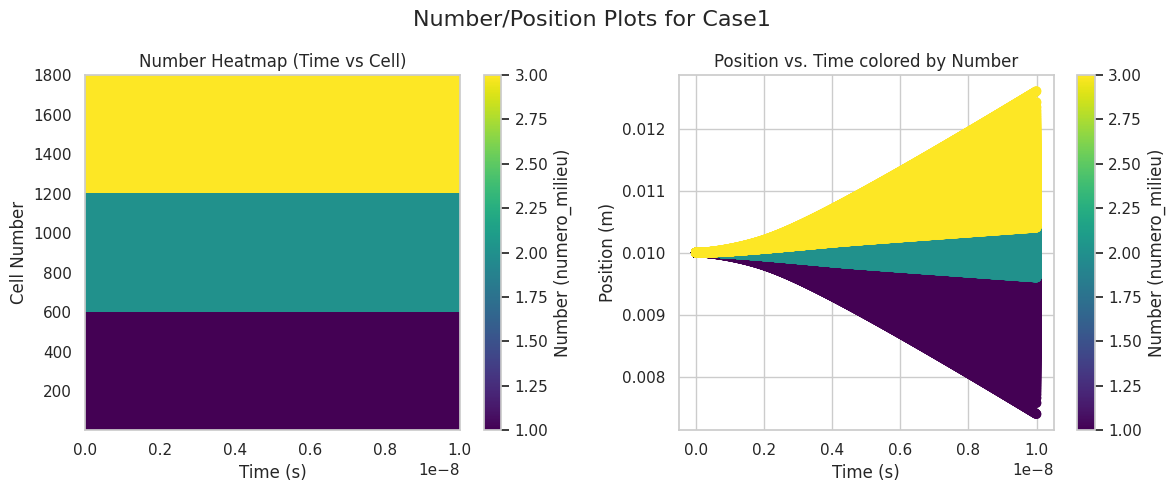

In [ ]:

case_data_number = process_multiple_directories_number(directories)
process_and_plot_all_number(directories, case_data_number)

In [ ]:
def plot_number_scatter_shuffle(df_pos_number, df_number, output_dir, case_name):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import os

    plt.close('all')

    sns.set(style="whitegrid")
    plt.rcParams["figure.figsize"] = (12, 5)

    # Melt and merge
    long_pos_number = df_pos_number.melt(id_vars='time', var_name='cell', value_name='position')
    long_number = df_number.melt(id_vars='time', var_name='cell', value_name='number')
    merged_number = pd.merge(long_pos_number, long_number, on=['time', 'cell'])

    # 1x2 grid
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Number/Position Plots (Shuffled) for {case_name}", fontsize=16)

    # 1. Number Heatmap (Time vs Cell)
    merged_number['cell_num'] = merged_number['cell'].str.extract(r'(\d+)').astype(int)
    number_matrix = merged_number.pivot(index='time', columns='cell_num', values='number')
    time = number_matrix.index.values
    cell_nums = number_matrix.columns.values
    time_edges = np.append(time, time[-1] + (time[-1] - time[-2]) if len(time) > 1 else 1)
    cell_edges = np.append(cell_nums, cell_nums[-1] + (cell_nums[-1] - cell_nums[-2]) if len(cell_nums) > 1 else 1)
    mesh_num = axs[0].pcolormesh(
        time_edges, cell_edges, number_matrix.values.T, shading='auto', cmap='viridis'
    )
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Cell Number')
    axs[0].set_title('Number Heatmap (Time vs Cell)')
    fig.colorbar(mesh_num, ax=axs[0], label='Number (numero_milieu)')

    # 2. Position vs. Time colored by Number (shuffled, low alpha)
    shuffled_number = merged_number.sample(frac=1, random_state=0)
    scatter_num = axs[1].scatter(
        shuffled_number['time'],
        shuffled_number['position'],
        c=shuffled_number['number'],
        cmap='viridis',
        alpha=0.15,
        s=5
    )
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Position (m)')
    axs[1].set_title('Position vs. Time colored by Number (Shuffled)')
    fig.colorbar(scatter_num, ax=axs[1], label='Number (numero_milieu)')

    plot_filename = os.path.join(output_dir, f'{case_name}_Number_Plots_ScatterShuffled.png')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(plot_filename)
    plt.show()


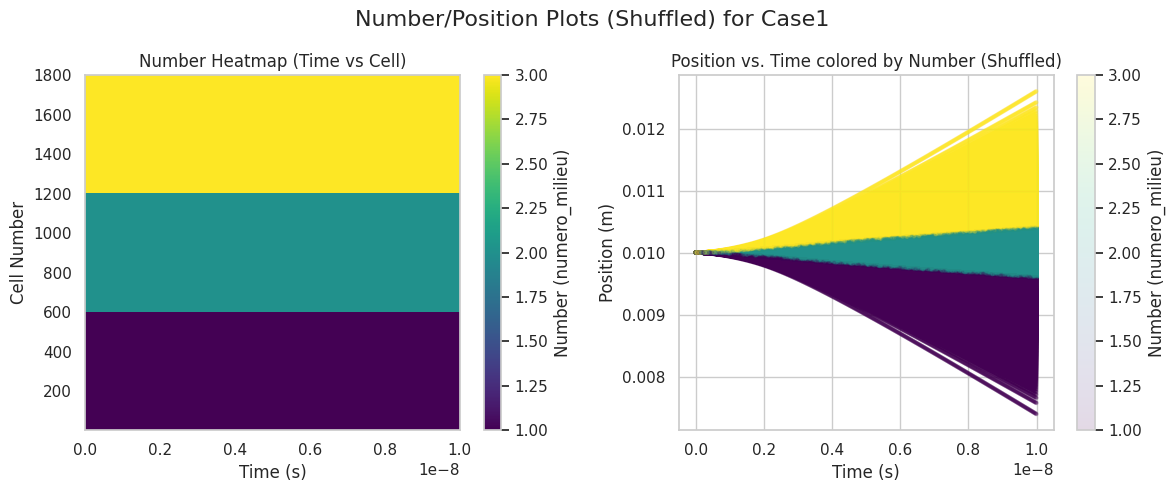

In [ ]:
for directory in directories:
    df_pos_number = case_data_number[directory]['df_pos_number']
    df_number = case_data_number[directory]['df_number']
    plot_number_scatter_shuffle(df_pos_number, df_number, directory, directory)


In [ ]:
def plot_number_scatter_shuffle_zoom(df_pos_number, df_number, output_dir, case_name):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import os

    plt.close('all')
    sns.set(style="whitegrid")
    plt.rcParams["figure.figsize"] = (12, 5)

    # Melt and merge
    long_pos_number = df_pos_number.melt(id_vars='time', var_name='cell', value_name='position')
    long_number = df_number.melt(id_vars='time', var_name='cell', value_name='number')
    merged_number = pd.merge(long_pos_number, long_number, on=['time', 'cell'])

    # Compute zoomed-in time range
    tmin = merged_number['time'].min()
    tmax = merged_number['time'].max()
    time_cut = tmin + 0.4 * (tmax - tmin)

    # Filter to first 40% of the time range
    merged_number_zoom = merged_number[merged_number['time'] <= time_cut]

    # 1x2 grid
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Number/Position Plots (First 40% Time) for {case_name}", fontsize=16)

    # 1. Number Heatmap (Time vs Cell)
    merged_number_zoom['cell_num'] = merged_number_zoom['cell'].str.extract(r'(\d+)').astype(int)
    number_matrix = merged_number_zoom.pivot(index='time', columns='cell_num', values='number')
    time = number_matrix.index.values
    cell_nums = number_matrix.columns.values
    time_edges = np.append(time, time[-1] + (time[-1] - time[-2]) if len(time) > 1 else 1)
    cell_edges = np.append(cell_nums, cell_nums[-1] + (cell_nums[-1] - cell_nums[-2]) if len(cell_nums) > 1 else 1)
    mesh_num = axs[0].pcolormesh(
        time_edges, cell_edges, number_matrix.values.T, shading='auto', cmap='viridis'
    )
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Cell Number')
    axs[0].set_title('Number Heatmap (First 40% of Time)')
    fig.colorbar(mesh_num, ax=axs[0], label='Number (numero_milieu)')

    # 2. Position vs. Time colored by Number (shuffled, low alpha)
    shuffled_number = merged_number_zoom.sample(frac=1, random_state=0)
    scatter_num = axs[1].scatter(
        shuffled_number['time'],
        shuffled_number['position'],
        c=shuffled_number['number'],
        cmap='viridis',
        alpha=0.15,
        s=5
    )
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Position (m)')
    axs[1].set_title('Position vs. Time colored by Number (Shuffled, First 40%)')
    fig.colorbar(scatter_num, ax=axs[1], label='Number (numero_milieu)')

    plot_filename = os.path.join(output_dir, f'{case_name}_Number_Plots_ScatterShuffled_Zoom40.png')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(plot_filename)
    plt.show()


/tmp/ipython-input-19-3628453678.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_number_zoom['cell_num'] = merged_number_zoom['cell'].str.extract(r'(\d+)').astype(int)


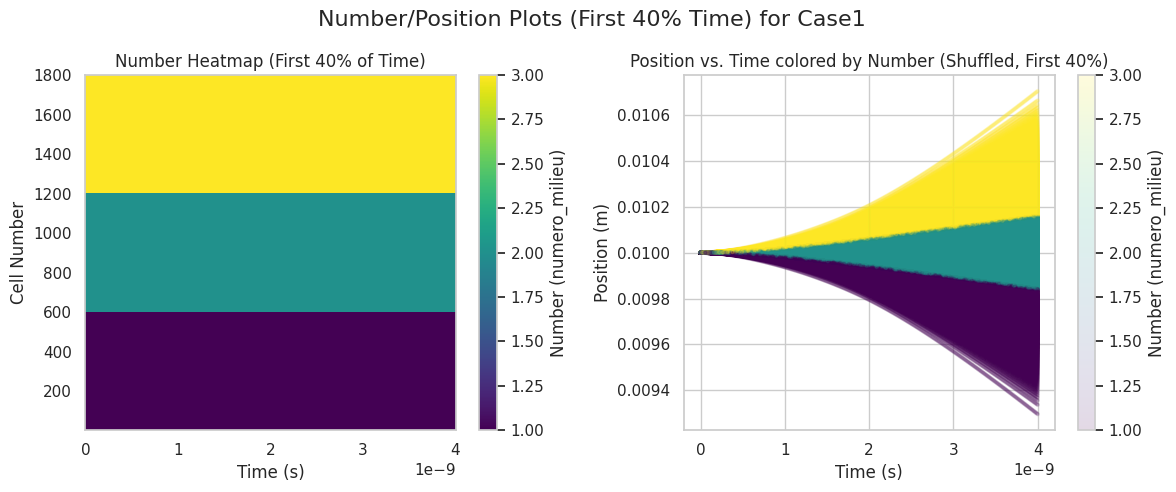

In [ ]:
for directory in directories:
    df_pos_number = case_data_number[directory]['df_pos_number']
    df_number = case_data_number[directory]['df_number']
    plot_number_scatter_shuffle_zoom(df_pos_number, df_number, directory, directory)

In [ ]:
def plot_number_hexbin(df_pos_number, df_number, output_dir, case_name):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import os

    plt.close('all')

    sns.set(style="whitegrid")
    plt.rcParams["figure.figsize"] = (12, 5)

    # Melt and merge
    long_pos_number = df_pos_number.melt(id_vars='time', var_name='cell', value_name='position')
    long_number = df_number.melt(id_vars='time', var_name='cell', value_name='number')
    merged_number = pd.merge(long_pos_number, long_number, on=['time', 'cell'])

    # 1x2 grid
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Number/Position Hexbin Plots for {case_name}", fontsize=16)

    # 1. Number Heatmap (Time vs Cell)
    merged_number['cell_num'] = merged_number['cell'].str.extract(r'(\d+)').astype(int)
    number_matrix = merged_number.pivot(index='time', columns='cell_num', values='number')
    time = number_matrix.index.values
    cell_nums = number_matrix.columns.values
    time_edges = np.append(time, time[-1] + (time[-1] - time[-2]) if len(time) > 1 else 1)
    cell_edges = np.append(cell_nums, cell_nums[-1] + (cell_nums[-1] - cell_nums[-2]) if len(cell_nums) > 1 else 1)
    mesh_num = axs[0].pcolormesh(
        time_edges, cell_edges, number_matrix.values.T, shading='auto', cmap='viridis'
    )
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Cell Number')
    axs[0].set_title('Number Heatmap (Time vs Cell)')
    fig.colorbar(mesh_num, ax=axs[0], label='Number (numero_milieu)')

    # 2. Position vs. Time colored by Number (HEXBIN)
    hb_num = axs[1].hexbin(
        merged_number['time'],
        merged_number['position'],
        C=merged_number['number'],
        gridsize=100,
        cmap='viridis',
        reduce_C_function=np.mean
    )
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Position (m)')
    axs[1].set_title('Position vs. Time colored by Number (Hexbin)')
    fig.colorbar(hb_num, ax=axs[1], label='Mean Number (numero_milieu)')

    plot_filename = os.path.join(output_dir, f'{case_name}_Number_Plots_Hexbin.png')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(plot_filename)
    plt.show()


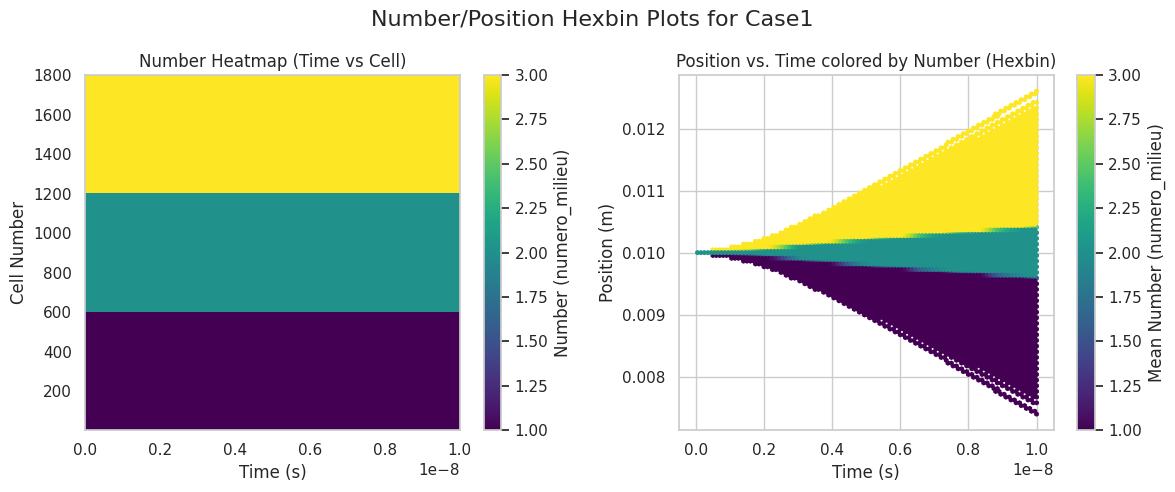

In [ ]:
for directory in directories:
    df_pos_number = case_data_number[directory]['df_pos_number']
    df_number = case_data_number[directory]['df_number']
    plot_number_hexbin(df_pos_number, df_number, directory, directory)


# Plotting Slices

NameError: name 'output_dir' is not defined

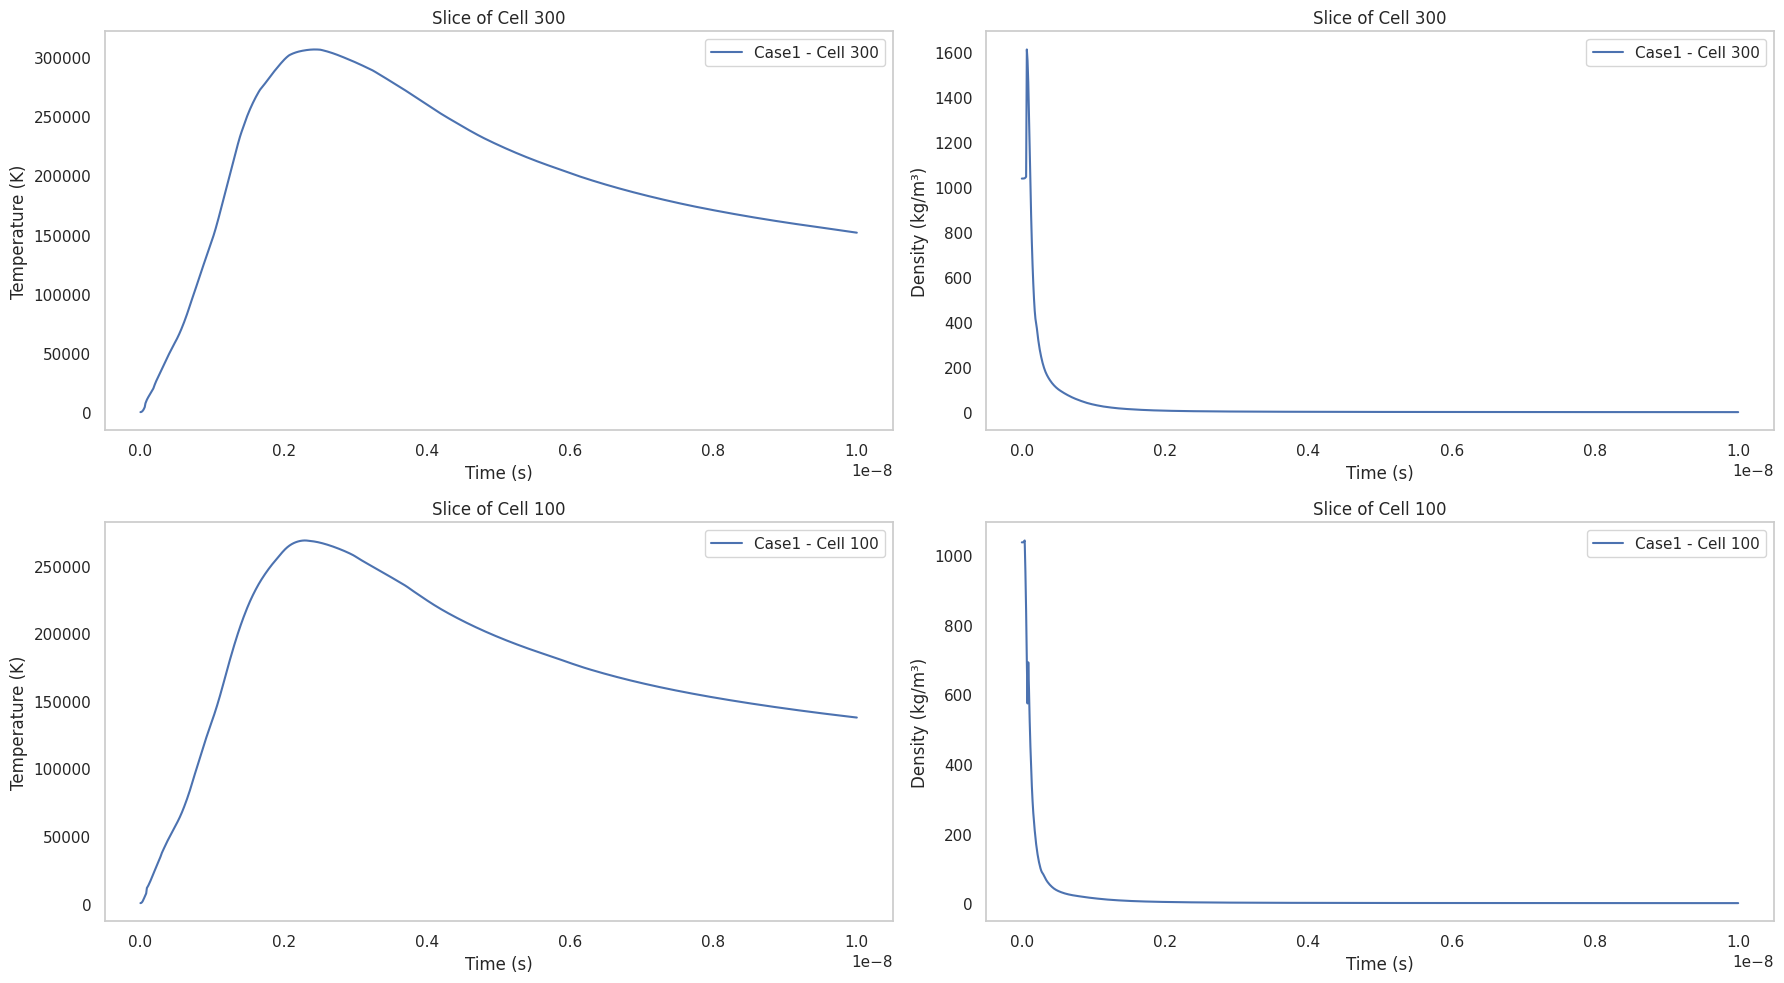

In [ ]:

# List of cases
cases = directories  # Add more cases as needed

# Define the cell indices you want to plot
n = 300
m = 100

# Example: Use a dictionary to store your DataFrames
# This assumes that you already have df_temp_case1, df_temp_case2, df_temp_case3, etc.
df_dict_temp = {
    'Case1': df_temp_case1
    # Add more cases as needed
}

df_dict_dens = {
    'Case1': df_dens_case1
    # Add more cases as needed
}

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Loop through each axis and plot for all cases
for case in cases:
    # Get the corresponding DataFrames for each case
    df_temp = df_dict_temp.get(case)
    df_dens = df_dict_dens.get(case)

    # Check if the DataFrame is valid
    if df_temp is not None and df_dens is not None:
        # Plot Temperature for Cell n on axes[0, 0]
        axes[0, 0].plot(df_temp.iloc[:, 0], df_temp.iloc[:, n-1], label=f'{case} - Cell {n}')
        axes[0, 0].grid()
        axes[0, 0].set_xlabel('Time (s)')
        axes[0, 0].set_ylabel('Temperature (K)')
        axes[0, 0].set_title(f'Slice of Cell {n}')
        axes[0, 0].legend()

        # Plot Density for Cell n on axes[0, 1]
        axes[0, 1].plot(df_dens.iloc[:, 0], df_dens.iloc[:, n-1], label=f'{case} - Cell {n}')
        axes[0, 1].grid()
        axes[0, 1].set_xlabel('Time (s)')
        axes[0, 1].set_ylabel('Density (kg/m³)')
        axes[0, 1].set_title(f'Slice of Cell {n}')
        axes[0, 1].legend()

        # Plot Temperature for Cell m on axes[1, 0]
        axes[1, 0].plot(df_temp.iloc[:, 0], df_temp.iloc[:, m-1], label=f'{case} - Cell {m}')
        axes[1, 0].grid()
        axes[1, 0].set_xlabel('Time (s)')
        axes[1, 0].set_ylabel('Temperature (K)')
        axes[1, 0].set_title(f'Slice of Cell {m}')
        axes[1, 0].legend()


        # Plot Density for Cell m on axes[1, 1]
        axes[1, 1].plot(df_dens.iloc[:, 0], df_dens.iloc[:, m-1], label=f'{case} - Cell {m}')
        axes[1, 1].grid()
        axes[1, 1].set_xlabel('Time (s)')
        axes[1, 1].set_ylabel('Density (kg/m³)')
        axes[1, 1].set_title(f'Slice of Cell {m}')
        axes[1, 1].legend()
    else:
        print(f"Data for {case} is missing or not valid!")

# Adjust layout to avoid overlapping
plt.tight_layout()

# Save the plot
plot_filename = os.path.join(output_dir, f'Temperature_and_Density_Evolution.png')
plt.savefig(plot_filename)  # You can change the filename and format as needed

# Show the plot
plt.show()

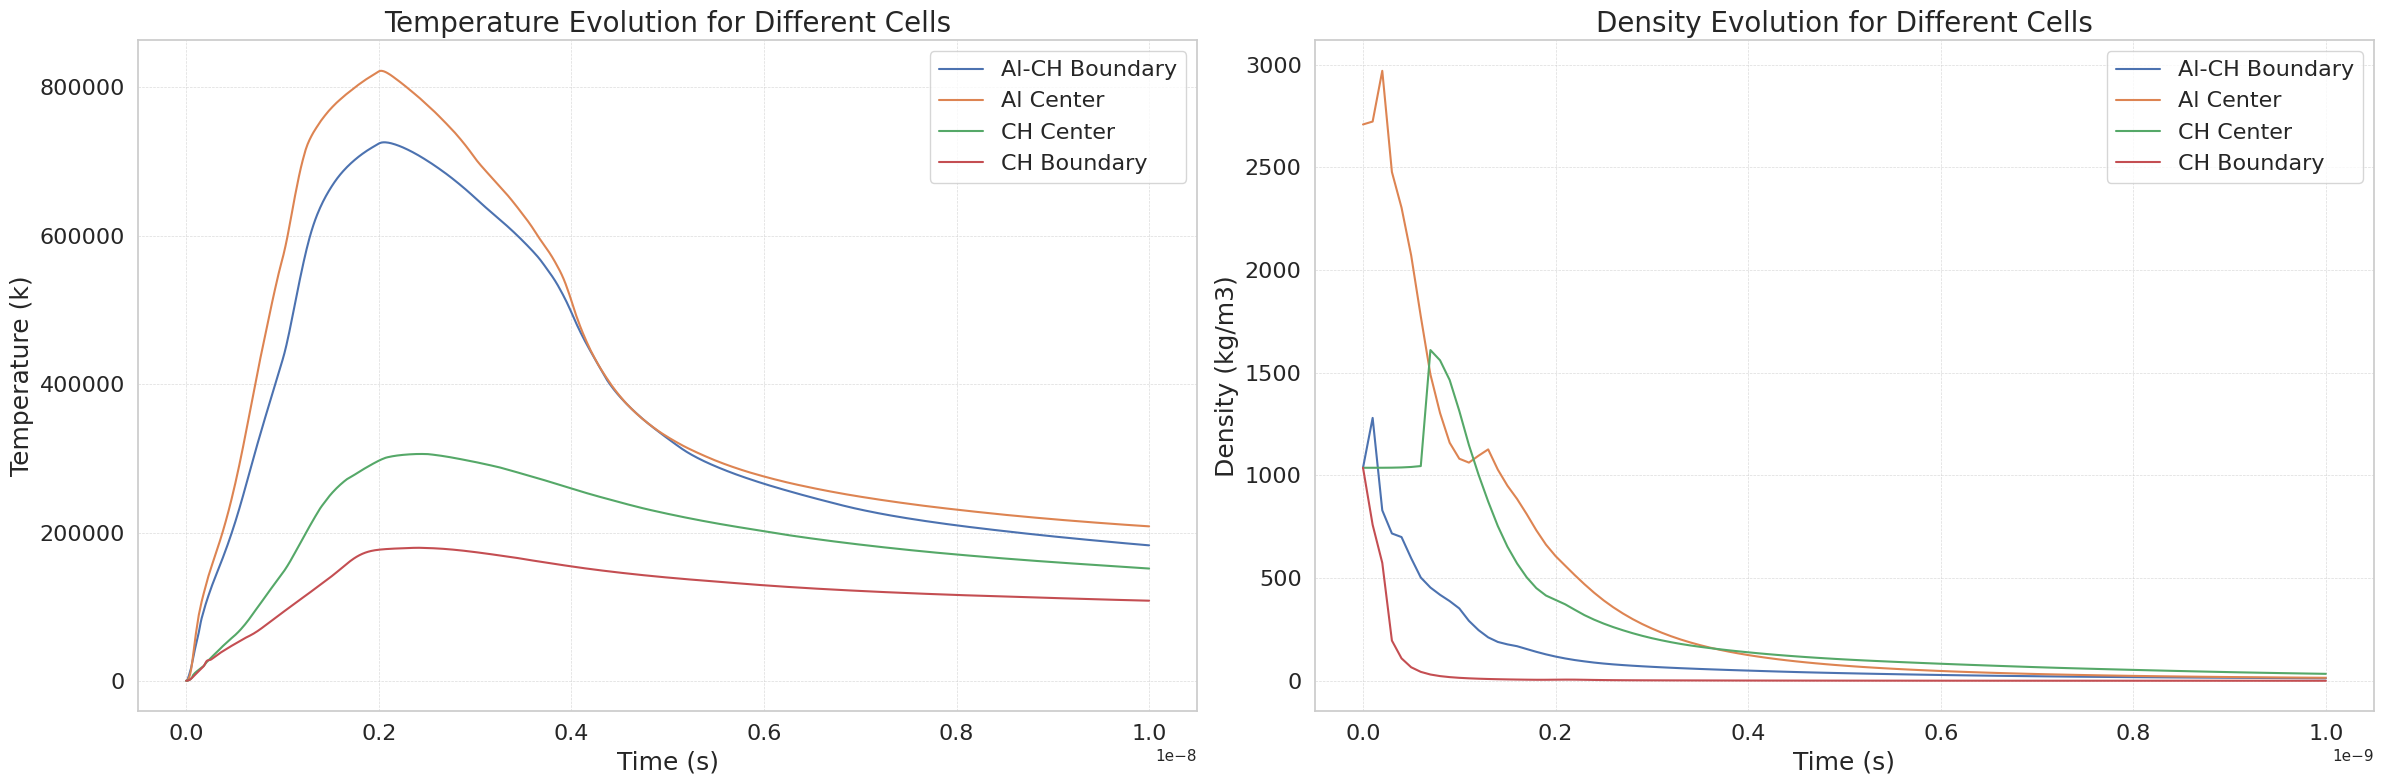

<Figure size 1200x500 with 0 Axes>

In [ ]:
# Cell Number

n=600
m=900
p=300
q=1800

fig, axes = plt.subplots(1, 2, figsize=(24, 8))

axes[0].plot(df_temp_case1.iloc[:, 0] , df_temp_case1.iloc[:, n-1], label = 'Al-CH Boundary')
axes[0].plot(df_temp_case1.iloc[:, 0] , df_temp_case1.iloc[:, m-1], label = 'Al Center')
axes[0].plot(df_temp_case1.iloc[:, 0] , df_temp_case1.iloc[:, p-1], label = 'CH Center')
axes[0].plot(df_temp_case1.iloc[:, 0] , df_temp_case1.iloc[:, q-1], label = 'CH Boundary')
axes[0].grid()
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Temperature (k)')
axes[0].set_title(f'Temperature Evolution for Different Cells')
axes[0].legend()



# Filter the DataFrame for t <= 3 ns
df_short = df_dens_case1[df_dens_case1.iloc[:, 0] <= 1e-9]

axes[1].plot(df_short.iloc[:, 0], df_short.iloc[:, n-1], label='Al-CH Boundary')
axes[1].plot(df_short.iloc[:, 0], df_short.iloc[:, m-1], label='Al Center')
axes[1].plot(df_short.iloc[:, 0], df_short.iloc[:, p-1], label='CH Center')
axes[1].plot(df_short.iloc[:, 0], df_short.iloc[:, q-1], label='CH Boundary')
axes[1].grid()
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Density (kg/m3)')
axes[1].set_title(f'Density Evolution for Different Cells')
axes[1].legend()

for ax in axes:
    ax.set_xlabel('Time (s)', fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)  # Keep label from your code
    ax.set_title(ax.get_title(), fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(fontsize=16)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

output_dir = 'Case1'
plot_filename = os.path.join(output_dir, 'Cell_Evolution.png')
plt.savefig(plot_filename)

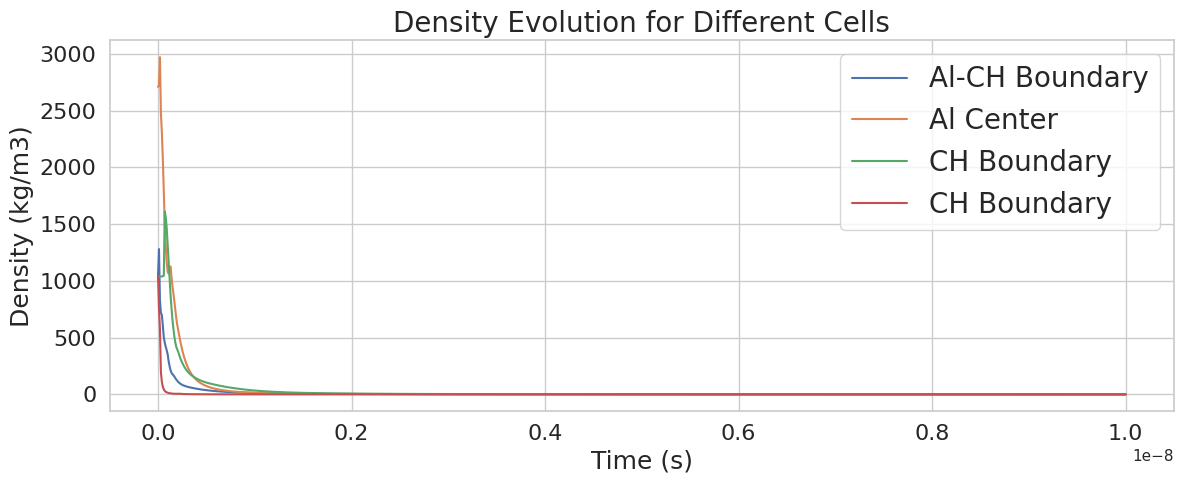

In [ ]:
plt.plot(df_dens_case1.iloc[:, 0], df_dens_case1.iloc[:, n-1], label='Al-CH Boundary')
plt.plot(df_dens_case1.iloc[:, 0], df_dens_case1.iloc[:, m-1], label='Al Center')
plt.plot(df_dens_case1.iloc[:, 0], df_dens_case1.iloc[:, p-1], label='CH Boundary')
plt.plot(df_dens_case1.iloc[:, 0], df_dens_case1.iloc[:, q-1], label='CH Boundary')

plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Density (kg/m3)', fontsize=18)
plt.title('Density Evolution for Different Cells', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=20)

plt.tight_layout()
plt.show()


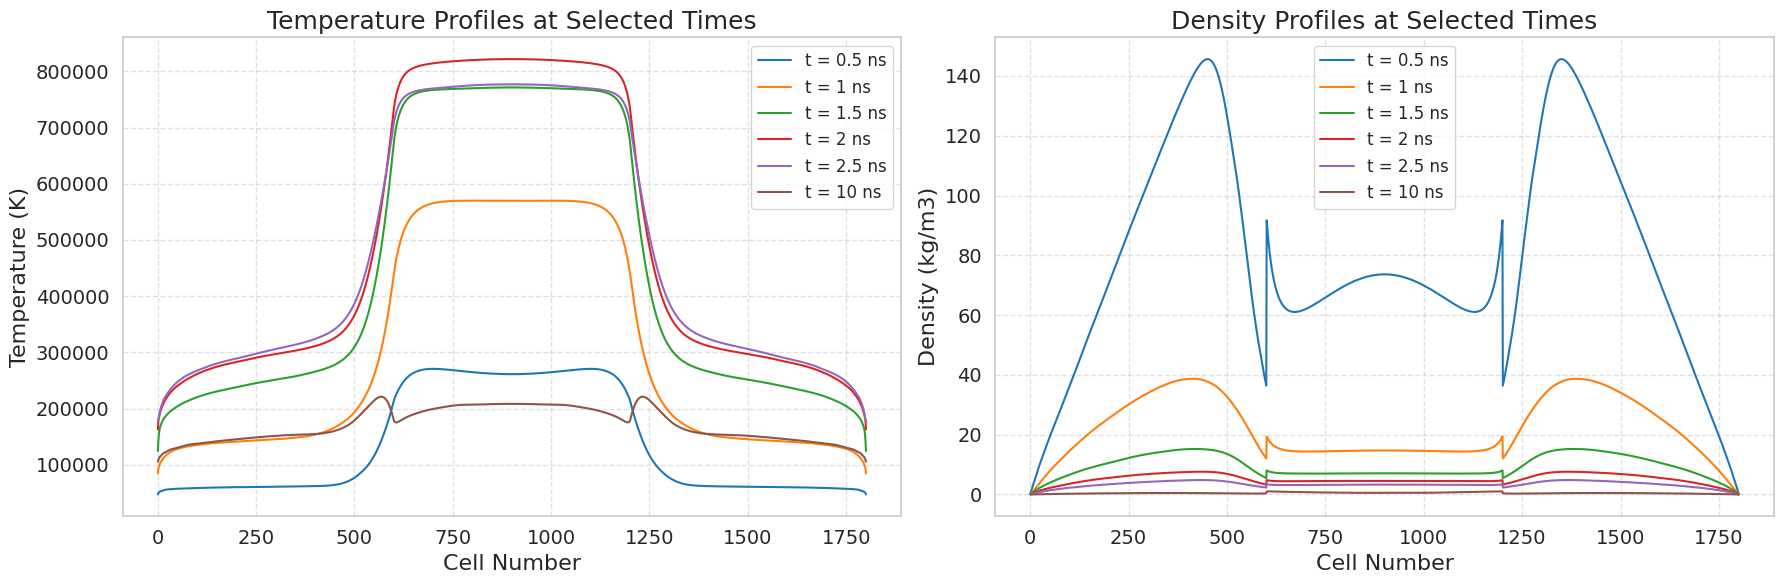

In [ ]:
# Example: plot profiles at 0.5 ns, 2 ns, 5 ns
times_ns = [0.5, 1, 1.5, 2, 2.5, 10]  # in ns
times = [t * 1e-9 for t in times_ns]  # convert to seconds
colors = [
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red',
    'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'
]


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
cell_numbers = np.arange(1, df_temp_case1.shape[1])  # Exclude time column

for i, t0 in enumerate(times):
    # Find nearest index for t0
    idx_temp = (df_temp_case1.iloc[:, 0] - t0).abs().idxmin()
    temp_row = df_temp_case1.iloc[idx_temp, 1:]

    idx_dens = (df_dens_case1.iloc[:, 0] - t0).abs().idxmin()
    dens_row = df_dens_case1.iloc[idx_dens, 1:]

    label = f"t = {times_ns[i]} ns"
    color = colors[i % len(colors)]

    axes[0].plot(cell_numbers, temp_row, label=label, color=color)
    axes[1].plot(cell_numbers, dens_row, label=label, color=color)

# Format plots
axes[0].set_xlabel('Cell Number', fontsize=16)
axes[0].set_ylabel('Temperature (K)', fontsize=16)
axes[0].set_title('Temperature Profiles at Selected Times', fontsize=18)
axes[0].legend(fontsize=12)
axes[0].tick_params(axis='both', labelsize=14)
axes[0].grid(True, linestyle='--', alpha=0.6)

axes[1].set_xlabel('Cell Number', fontsize=16)
axes[1].set_ylabel('Density (kg/m3)', fontsize=16)
axes[1].set_title('Density Profiles at Selected Times', fontsize=18)
axes[1].legend(fontsize=12)
axes[1].tick_params(axis='both', labelsize=14)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


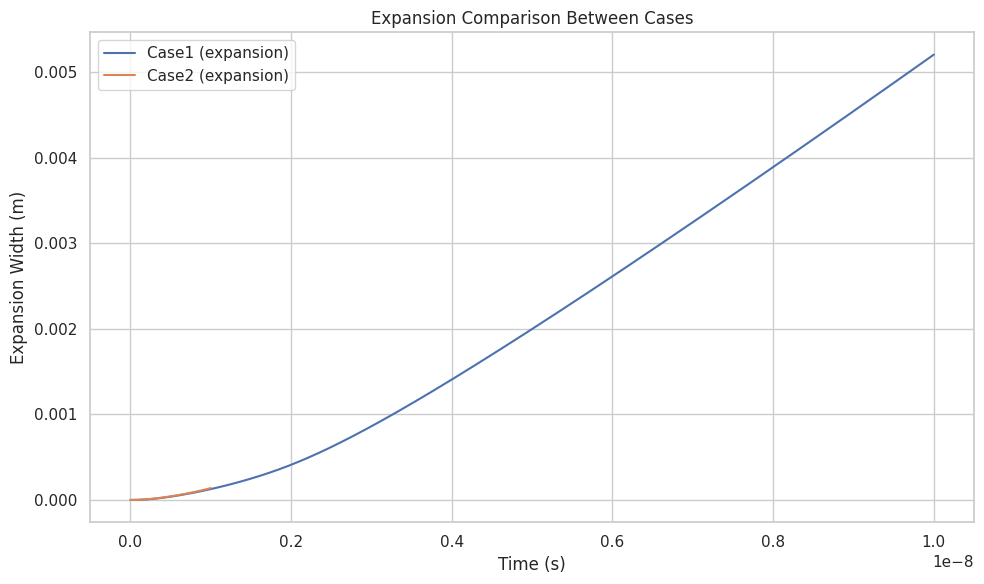

In [ ]:
def plot_expansion_comparison(df_pos_dict, case_names, output_path):
    """
    Plot expansion (position spread) over time for multiple cases.

    Args:
        df_pos_dict (dict): Dictionary like {'Case1': df_pos_case1, 'Case2': df_pos_case2}
        case_names (list): List of case names in df_pos_dict to compare
        output_path (str): Path to save the output plot
    """
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=(10, 6))

    for case in case_names:
        df = df_pos_dict[case]
        times = df['time']
        pos_min = df.drop(columns='time').min(axis=1)
        pos_max = df.drop(columns='time').max(axis=1)
        spread = pos_max - pos_min

        plt.plot(times, spread, label=f"{case} (expansion)")

    plt.xlabel("Time (s)")
    plt.ylabel("Expansion Width (m)")
    plt.title("Expansion Comparison Between Cases")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()


df_pos_dict = {
    'Case1': df_pos_case1,
    'Case2': df_pos_case2
}
plot_expansion_comparison(df_pos_dict, ['Case1', 'Case2'], 'comparison_expansion.png')

In [ ]:
print(df_pos_case1['time'].max())
print(df_pos_case2['time'].max())
print(df_pos_case2.shape)


1e-08
1e-09
(101, 601)
